<a href="https://colab.research.google.com/github/Hardik-Garbyal/LSTM_Model/blob/main/Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import random
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

Reading the input data


In [ ]:
df = pd.read_excel('test.xlsx')
df

,Name,Sem1-1,Sem1-2,Sem2-1,Sem2-2,Sem3-1,Sem3-2,Attendance,CCA,Achievements,Skills,Grades
0,John,87,78,94,44,42,74,87,"Dance,Sing","Leetcode,GFG","JAVA,C++,King",NaN
1,Cena,55,43,32,44,67,92,66,"Fight,Sports","IEEE, TA","King,Qyeen",NaN
2,King,98,99,89,91,93,94,100,"Dnace,Singh,Debate","Olympiad winner,Hero","JAVA,DSA,Phtyon,ML,DSA",NaN
3,Queen,12,45,23,55,50,44,13,"nt,fs","dog,cat","JAVA,DSA,Phtyon,ML,DSA",NaN
4,Pawn,20,39,12,33,33,12,21,"Sing,Dance",Win,"JAVA,Python",NaN
5,Rook,40,40,45,34,15,66,55,"Sing,Dance",Win,"King,Qyeen",NaN
6,Bishop,87,87,97,78,98,88,92,"Fight,Sports","Olympiad winner,Hero","JAVA,DSA,Phtyon,ML,DSA",NaN
7,Knight,53,88,66,44,21,12,77,"Dance,Sing","IEEE, TA","King,Qyeen",NaN
8,finn,22,12,32,33,33,33,54,"Dance,Sing","IEEE, TA","JAVA,DSA,Phtyon,ML,DSA",NaN
9,ko,33,33,33,33,33,33,75,"Fight,Sports","IEEE, TA",java,NaN


Adding various parameters

In [ ]:
df["Dropout"] = ""
df["Good Performance"] =""
df["Poor Performance"] = ""
df["Support"] = ""
df["Placement Eligible"] =""

In [ ]:
df

,Name,Sem1-1,Sem1-2,Sem2-1,Sem2-2,Sem3-1,Sem3-2,Attendance,CCA,Achievements,Skills,Grades,Dropout,Good Performance,Poor Performance,Support,Placement Eligible
0,John,87,78,94,44,42,74,87,"Dance,Sing","Leetcode,GFG","JAVA,C++,King",NaN,,,,,
1,Cena,55,43,32,44,67,92,66,"Fight,Sports","IEEE, TA","King,Qyeen",NaN,,,,,
2,King,98,99,89,91,93,94,100,"Dnace,Singh,Debate","Olympiad winner,Hero","JAVA,DSA,Phtyon,ML,DSA",NaN,,,,,
3,Queen,12,45,23,55,50,44,13,"nt,fs","dog,cat","JAVA,DSA,Phtyon,ML,DSA",NaN,,,,,
4,Pawn,20,39,12,33,33,12,21,"Sing,Dance",Win,"JAVA,Python",NaN,,,,,
5,Rook,40,40,45,34,15,66,55,"Sing,Dance",Win,"King,Qyeen",NaN,,,,,
6,Bishop,87,87,97,78,98,88,92,"Fight,Sports","Olympiad winner,Hero","JAVA,DSA,Phtyon,ML,DSA",NaN,,,,,
7,Knight,53,88,66,44,21,12,77,"Dance,Sing","IEEE, TA","King,Qyeen",NaN,,,,,
8,finn,22,12,32,33,33,33,54,"Dance,Sing","IEEE, TA","JAVA,DSA,Phtyon,ML,DSA",NaN,,,,,
9,ko,33,33,33,33,33,33,75,"Fight,Sports","IEEE, TA",java,NaN,,,,,


Functions

In [ ]:
def calculate_dropout(min_marks,attendance):
    # Calculate dropout
    if min_marks < 35 and attendance < 30:
        return 1
    else:
        return 0


In [ ]:
def calculate_good(min_marks):
  if min_marks > 60:
    return 1
  else:
    return 0

In [ ]:
def calculate_poor(max_marks):
  if max_marks < 40:
    return 1
  else:
    return 0

In [ ]:
def calculate_support_required(k):
    support_required = 1 if any(40 <= grade < 60 for grade in k) else 0
    return support_required


In [ ]:
def is_eligible(k, j, i, h):
    criteria = 1 if all(grade > 65 for grade in k) and (j or i or h) else 0
    return criteria


Calculating parameters for each student

In [ ]:
for index, row in df.iterrows():
    # Access the values in each column for the current row
    a = row['Sem1-1']
    b = row['Sem1-2']
    c = row['Sem2-1']
    d = row['Sem2-2']
    e = row['Sem3-1']
    f = row['Sem3-2']
    g = row['Attendance']
    h = row['CCA']
    i = row['Achievements']
    j = row['Skills']
    semester_grades = [a, b, c, d, e, f]
    cult =[h,i,j]
    values = ','.join([str(i) for i in semester_grades])
    df.loc[index,'Grades'] = values
    if len(h) > 0:
      havecca = True
    else:
      havecca = False
    
    if len(i) > 0:
      achieved = True
    else:
      achieved = False
    
    if len(j) > 0:
      haveskills = True
    else:
      haveskills = False

    

    min = np.min(semester_grades)
    max = np.max(semester_grades)
    dp = calculate_dropout(min,g)
    df.loc[index, 'Dropout'] = dp


    gp = calculate_good(min)
    df.loc[index,'Good Performance'] = gp

    pp = calculate_poor(max)
    df.loc[index,'Poor Performance'] = pp

    sr =  calculate_support_required(semester_grades)
    df.loc[index,'Support'] = sr

    eligible = is_eligible(semester_grades, havecca, achieved, haveskills)
    df.loc[index,'Placement Eligible'] = eligible


    df.to_excel('text.xlsx', index=False)
   

In [ ]:
df

,Name,Sem1-1,Sem1-2,Sem2-1,Sem2-2,Sem3-1,Sem3-2,Attendance,CCA,Achievements,Skills,Grades,Dropout,Good Performance,Poor Performance,Support,Placement Eligible
0,John,87,78,94,44,42,74,87,"Dance,Sing","Leetcode,GFG","JAVA,C++,King","87,78,94,44,42,74",0,0,0,1,0
1,Cena,55,43,32,44,67,92,66,"Fight,Sports","IEEE, TA","King,Qyeen","55,43,32,44,67,92",0,0,0,1,0
2,King,98,99,89,91,93,94,100,"Dnace,Singh,Debate","Olympiad winner,Hero","JAVA,DSA,Phtyon,ML,DSA","98,99,89,91,93,94",0,1,0,0,1
3,Queen,12,45,23,55,50,44,13,"nt,fs","dog,cat","JAVA,DSA,Phtyon,ML,DSA","12,45,23,55,50,44",1,0,0,1,0
4,Pawn,20,39,12,33,33,12,21,"Sing,Dance",Win,"JAVA,Python","20,39,12,33,33,12",1,0,1,0,0
5,Rook,40,40,45,34,15,66,55,"Sing,Dance",Win,"King,Qyeen","40,40,45,34,15,66",0,0,0,1,0
6,Bishop,87,87,97,78,98,88,92,"Fight,Sports","Olympiad winner,Hero","JAVA,DSA,Phtyon,ML,DSA","87,87,97,78,98,88",0,1,0,0,1
7,Knight,53,88,66,44,21,12,77,"Dance,Sing","IEEE, TA","King,Qyeen","53,88,66,44,21,12",0,0,0,1,0
8,finn,22,12,32,33,33,33,54,"Dance,Sing","IEEE, TA","JAVA,DSA,Phtyon,ML,DSA","22,12,32,33,33,33",0,0,1,0,0
9,ko,33,33,33,33,33,33,75,"Fight,Sports","IEEE, TA",java,"33,33,33,33,33,33",0,0,1,0,0


Preparing training and testing data

In [ ]:
X = df.iloc[:, 1:7].values # Only use the semester percentages as input
y = df.loc[:, ['Attendance', 'Dropout', 'Good Performance', 'Poor Performance', 'Support', 'Placement Eligible']].values

In [ ]:
X = df.iloc[:, 1:7].values # Only use the semester percentages as input
y = df.iloc[:, 12:].values

In [ ]:
X

array([[87, 78, 94, 44, 42, 74],
       [55, 43, 32, 44, 67, 92],
       [98, 99, 89, 91, 93, 94],
       [12, 45, 23, 55, 50, 44],
       [20, 39, 12, 33, 33, 12],
       [40, 40, 45, 34, 15, 66],
       [87, 87, 97, 78, 98, 88],
       [53, 88, 66, 44, 21, 12],
       [22, 12, 32, 33, 33, 33],
       [33, 33, 33, 33, 33, 33]])

In [ ]:
y

array([[0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       [0, 1, 0, 0, 1],
       [1, 0, 0, 1, 0],
       [1, 0, 1, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 1, 0, 0, 1],
       [0, 0, 0, 1, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0]], dtype=object)

Fitting training datasets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print(X_train)

[[40 40 45 34 15 66]
 [87 78 94 44 42 74]
 [53 88 66 44 21 12]
 [98 99 89 91 93 94]
 [33 33 33 33 33 33]
 [20 39 12 33 33 12]
 [12 45 23 55 50 44]
 [87 87 97 78 98 88]]


In [ ]:
print(X_test)

[[22 12 32 33 33 33]
 [55 43 32 44 67 92]]


In [ ]:

X_train = X_train.astype(np.float32)
X_test = X_test.astype(np.float32)
y_train = y_train.astype(np.float32)
y_test = y_test.astype(np.float32)

In [ ]:
print(X_train)

[[40. 40. 45. 34. 15. 66.]
 [87. 78. 94. 44. 42. 74.]
 [53. 88. 66. 44. 21. 12.]
 [98. 99. 89. 91. 93. 94.]
 [33. 33. 33. 33. 33. 33.]
 [20. 39. 12. 33. 33. 12.]
 [12. 45. 23. 55. 50. 44.]
 [87. 87. 97. 78. 98. 88.]]


In [ ]:
print(X_test)

[[22. 12. 32. 33. 33. 33.]
 [55. 43. 32. 44. 67. 92.]]


In [ ]:
print(y_train)

[[0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 1.]
 [0. 0. 1. 0. 0.]
 [1. 0. 1. 0. 0.]
 [1. 0. 0. 1. 0.]
 [0. 1. 0. 0. 1.]]


In [ ]:
print(y_test)

[[0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]]


In [ ]:

X_train = (X_train - np.min(X_train)) / (np.max(X_train) - np.min(X_train))
X_test = (X_test - np.min(X_test)) / (np.max(X_test) - np.min(X_test))

In [ ]:
print(X_train)

[[0.3218391  0.3218391  0.37931034 0.25287357 0.03448276 0.62068963]
 [0.86206895 0.7586207  0.9425287  0.3678161  0.3448276  0.7126437 ]
 [0.47126436 0.87356323 0.62068963 0.3678161  0.10344828 0.        ]
 [0.9885057  1.         0.88505745 0.90804595 0.9310345  0.9425287 ]
 [0.2413793  0.2413793  0.2413793  0.2413793  0.2413793  0.2413793 ]
 [0.09195402 0.31034482 0.         0.2413793  0.2413793  0.        ]
 [0.         0.37931034 0.12643678 0.49425286 0.43678162 0.3678161 ]
 [0.86206895 0.86206895 0.9770115  0.7586207  0.9885057  0.87356323]]


In [ ]:
print(X_test)

[[0.125  0.     0.25   0.2625 0.2625 0.2625]
 [0.5375 0.3875 0.25   0.4    0.6875 1.    ]]


In [ ]:

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)


All prints are to verify datasets after each level

In [ ]:
# print(X_train)

In [ ]:
# print(X_test)

In [ ]:
# print(y_train)

In [ ]:
# print(y_test)

Defining the LSTM Model

In [ ]:

model = Sequential()
model.add(LSTM(64, input_shape=(X_train.shape[1], X_train.shape[2]), activation='relu'))
model.add(Dense(5, activation='sigmoid'))

In [ ]:

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
#Run it for more than 3 times for greater accuracy

history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/50
1/1 [==============================] - 0s 78ms/step - loss: 0.1306 - accuracy: 0.7500 - val_loss: 0.1858 - val_accuracy: 1.0000
Epoch 2/50
1/1 [==============================] - 0s 47ms/step - loss: 0.1292 - accuracy: 0.7500 - val_loss: 0.1912 - val_accuracy: 1.0000
Epoch 3/50
1/1 [==============================] - 0s 38ms/step - loss: 0.1277 - accuracy: 0.7500 - val_loss: 0.1971 - val_accuracy: 1.0000
Epoch 4/50
1/1 [==============================] - 0s 39ms/step - loss: 0.1262 - accuracy: 0.7500 - val_loss: 0.2028 - val_accuracy: 1.0000
Epoch 5/50
1/1 [==============================] - 0s 41ms/step - loss: 0.1248 - accuracy: 0.7500 - val_loss: 0.2085 - val_accuracy: 1.0000
Epoch 6/50
1/1 [==============================] - 0s 39ms/step - loss: 0.1233 - accuracy: 0.7500 - val_loss: 0.2147 - val_accuracy: 1.0000
Epoch 7/50
1/1 [==============================] - 0s 37ms/step - loss: 0.1218 - accuracy: 0.7500 - val_loss: 0.2197 - val_accuracy: 1.0000
Epoch 8/50
1/1 [===========

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                16896     
                                                                 
 dense (Dense)               (None, 5)                 325       
                                                                 
Total params: 17,221
Trainable params: 17,221
Non-trainable params: 0
_________________________________________________________________


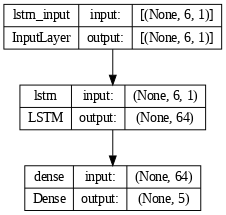

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, 
           show_shapes = True,
           show_dtype=False,
           show_layer_names = True, 
           rankdir = 'TB', 
           expand_nested = False, 
           dpi = 70)

Loading Model to predict student performance


In [ ]:
df["Prediction"] = ""
df

,Name,Sem1-1,Sem1-2,Sem2-1,Sem2-2,Sem3-1,Sem3-2,Attendance,CCA,Achievements,Skills,Grades,Dropout,Good Performance,Poor Performance,Support,Placement Eligible,Prediction,Total Marks,Percentage
0,John,87,78,94,44,42,74,87,"Dance,Sing","Leetcode,GFG","JAVA,C++,King","87,78,94,44,42,74",0,0,0,1,0,,419,69.833333
1,Cena,55,43,32,44,67,92,66,"Fight,Sports","IEEE, TA","King,Qyeen","55,43,32,44,67,92",0,0,0,1,0,,333,55.500000
2,King,98,99,89,91,93,94,100,"Dnace,Singh,Debate","Olympiad winner,Hero","JAVA,DSA,Phtyon,ML,DSA","98,99,89,91,93,94",0,1,0,0,1,,564,94.000000
3,Queen,12,45,23,55,50,44,13,"nt,fs","dog,cat","JAVA,DSA,Phtyon,ML,DSA","12,45,23,55,50,44",1,0,0,1,0,,229,38.166667
4,Pawn,20,39,12,33,33,12,21,"Sing,Dance",Win,"JAVA,Python","20,39,12,33,33,12",1,0,1,0,0,,149,24.833333
5,Rook,40,40,45,34,15,66,55,"Sing,Dance",Win,"King,Qyeen","40,40,45,34,15,66",0,0,0,1,0,,240,40.000000
6,Bishop,87,87,97,78,98,88,92,"Fight,Sports","Olympiad winner,Hero","JAVA,DSA,Phtyon,ML,DSA","87,87,97,78,98,88",0,1,0,0,1,,535,89.166667
7,Knight,53,88,66,44,21,12,77,"Dance,Sing","IEEE, TA","King,Qyeen","53,88,66,44,21,12",0,0,0,1,0,,284,47.333333
8,finn,22,12,32,33,33,33,54,"Dance,Sing","IEEE, TA","JAVA,DSA,Phtyon,ML,DSA","22,12,32,33,33,33",0,0,1,0,0,,165,27.500000
9,ko,33,33,33,33,33,33,75,"Fight,Sports","IEEE, TA",java,"33,33,33,33,33,33",0,0,1,0,0,,198,33.000000


In [ ]:
output = model.predict(X_test)
ans = []
for row in output:
    for val in row:
        if val < 0.5:
            res = "Bad Performer"
            
            ans.append(res)
        else:
            res = "Good Performer"
            
            ans.append(res)
    
print(ans)

1/1 [==============================] - 0s 32ms/step
['Good Performer', 'Bad Performer', 'Good Performer', 'Bad Performer', 'Bad Performer', 'Bad Performer', 'Bad Performer', 'Bad Performer', 'Good Performer', 'Bad Performer']


In [ ]:
for index, row in df.iterrows():
  x = 0
  df.loc[index,'Prediction'] = ans[index]
  
  # print(ans[index])
  df.to_excel('text.xlsx', index=False)
  

In [ ]:
df

,Name,Sem1-1,Sem1-2,Sem2-1,Sem2-2,Sem3-1,Sem3-2,Attendance,CCA,Achievements,Skills,Grades,Dropout,Good Performance,Poor Performance,Support,Placement Eligible,Prediction,Total Marks,Percentage
0,John,87,78,94,44,42,74,87,"Dance,Sing","Leetcode,GFG","JAVA,C++,King","87,78,94,44,42,74",0,0,0,1,0,Good Performer,419,69.833333
1,Cena,55,43,32,44,67,92,66,"Fight,Sports","IEEE, TA","King,Qyeen","55,43,32,44,67,92",0,0,0,1,0,Bad Performer,333,55.500000
2,King,98,99,89,91,93,94,100,"Dnace,Singh,Debate","Olympiad winner,Hero","JAVA,DSA,Phtyon,ML,DSA","98,99,89,91,93,94",0,1,0,0,1,Good Performer,564,94.000000
3,Queen,12,45,23,55,50,44,13,"nt,fs","dog,cat","JAVA,DSA,Phtyon,ML,DSA","12,45,23,55,50,44",1,0,0,1,0,Bad Performer,229,38.166667
4,Pawn,20,39,12,33,33,12,21,"Sing,Dance",Win,"JAVA,Python","20,39,12,33,33,12",1,0,1,0,0,Bad Performer,149,24.833333
5,Rook,40,40,45,34,15,66,55,"Sing,Dance",Win,"King,Qyeen","40,40,45,34,15,66",0,0,0,1,0,Bad Performer,240,40.000000
6,Bishop,87,87,97,78,98,88,92,"Fight,Sports","Olympiad winner,Hero","JAVA,DSA,Phtyon,ML,DSA","87,87,97,78,98,88",0,1,0,0,1,Bad Performer,535,89.166667
7,Knight,53,88,66,44,21,12,77,"Dance,Sing","IEEE, TA","King,Qyeen","53,88,66,44,21,12",0,0,0,1,0,Bad Performer,284,47.333333
8,finn,22,12,32,33,33,33,54,"Dance,Sing","IEEE, TA","JAVA,DSA,Phtyon,ML,DSA","22,12,32,33,33,33",0,0,1,0,0,Good Performer,165,27.500000
9,ko,33,33,33,33,33,33,75,"Fight,Sports","IEEE, TA",java,"33,33,33,33,33,33",0,0,1,0,0,Bad Performer,198,33.000000


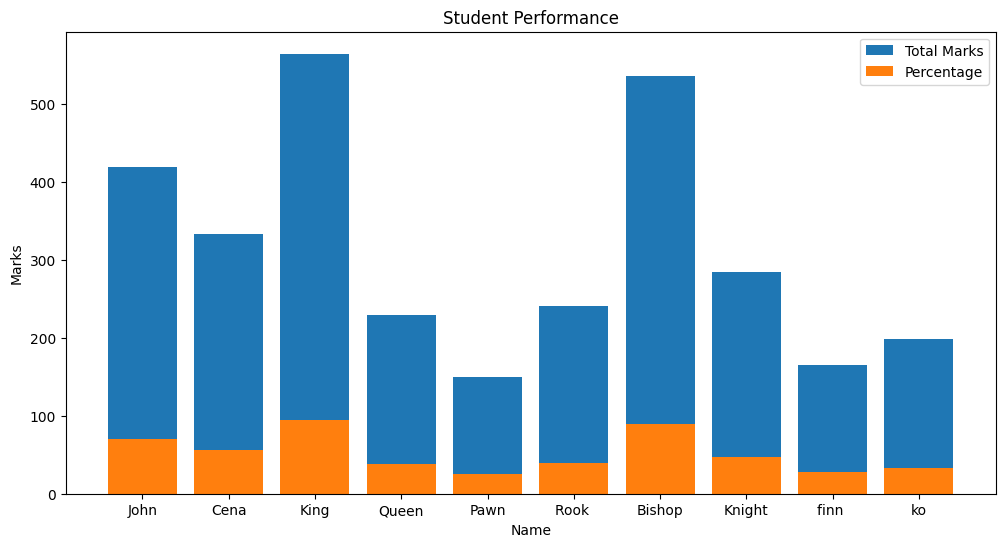

In [ ]:
df['Total Marks'] = df[['Sem1-1', 'Sem1-2', 'Sem2-1', 'Sem2-2', 'Sem3-1', 'Sem3-2']].sum(axis=1)
df['Percentage'] = df['Total Marks'] / 600 * 100

# create a bar chart of each student's total marks and percentage
plt.figure(figsize=(12, 6))
plt.bar(df['Name'], df['Total Marks'], label='Total Marks')
plt.bar(df['Name'], df['Percentage'], label='Percentage')
plt.xlabel('Name')
plt.ylabel('Marks')
plt.title('Student Performance')
plt.legend()
plt.show()